In [10]:
#import liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
plt.style.use('fivethirtyeight')




In [11]:
data = pd.read_csv('heart.csv')

In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


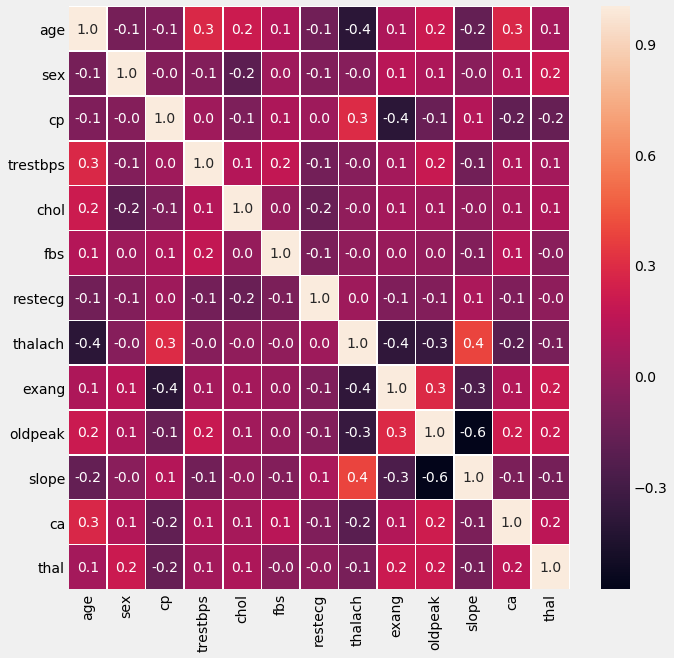

In [14]:
fig ,ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(data.drop(['target'],axis = 1).corr(),annot= True, linewidths=.5, fmt= '.1f');

In [16]:
#data shapiora test
from scipy.stats import shapiro
norm = []
for i in range(len(data.columns)):
    stat, p_value = shapiro(data[data.columns[i]])
    norm.append(p_value)
norm = pd.DataFrame(norm,index = data.columns)
norm.columns = ['p_value']
norm


,p_value
age,5.801409e-03
sex,2.750285e-26
cp,1.857026e-19
trestbps,1.458003e-06
chol,5.364669e-09
fbs,5.430913e-30
restecg,1.378427e-23
thalach,6.620329e-05
exang,3.846865e-26
oldpeak,8.183402e-17


In [17]:
alpha = 0.05
for i in range(len(norm)):
    if norm.p_value[i] > alpha:
        print('Orneklem ( {} ) Normal (Gaussian) dağılımdan gelmektedir, (H0 Fail to reject)'.format(norm.index[i]))  
    else:
        print('Orneklem ( {} )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)'.format(norm.index[i]))
    

Orneklem ( age )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( sex )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( cp )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( trestbps )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( chol )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( fbs )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( restecg )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( thalach )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( exang )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( oldpeak )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( slope )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( ca )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( thal )  Normal (Gaussian) dağılım gostermemektedir, (H0 Reject)
Orneklem ( target

In [18]:
#hedef değişkene göre varyans testlerı yapıcaz
#parametrelerim normal dalim göstermediği için levene testı bartlet testıne gore normal dağilim 
# göstermeyen değişkenlere daha fazla dayanıklıdır.

In [19]:
from scipy.stats import levene
lev = []
for i in range(len(data.columns)-1):
    stats , pvalue = levene(data[data.columns[-1]],data[data.columns[i]])
    lev.append(pvalue)
lev = pd.DataFrame(data = lev , index = data.columns[:len(data.columns)-1],columns=['pvalue'])
lev



,pvalue
age,1.365241e-84
sex,4.397192e-04
cp,1.879505e-27
trestbps,1.041126e-65
chol,8.850120e-66
fbs,2.767225e-17
restecg,2.911459e-01
thalach,6.186635e-79
exang,1.137898e-03
oldpeak,8.415606e-17


In [20]:
for i in range(len(lev)):
    if lev.pvalue[i] > alpha:
        print('Orneklem ( {} ) Orneklem Sabit varyansa(constant variance) sahiptir., (H0 Fail to reject)'.format(lev.index[i]))  
    else:
        print('Orneklem ( {} )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)'.format(lev.index[i]))

Orneklem ( age )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( sex )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( cp )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( trestbps )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( chol )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( fbs )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( restecg ) Orneklem Sabit varyansa(constant variance) sahiptir., (H0 Fail to reject)
Orneklem ( thalach )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( exang )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( oldpeak )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject)
Orneklem ( slope )  Orneklem Sabit varyansa(constant variance) sahip değildir, (H0 Reject

In [21]:
data.columns[:len(data.columns)-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Text(0, 0.5, 'slope')

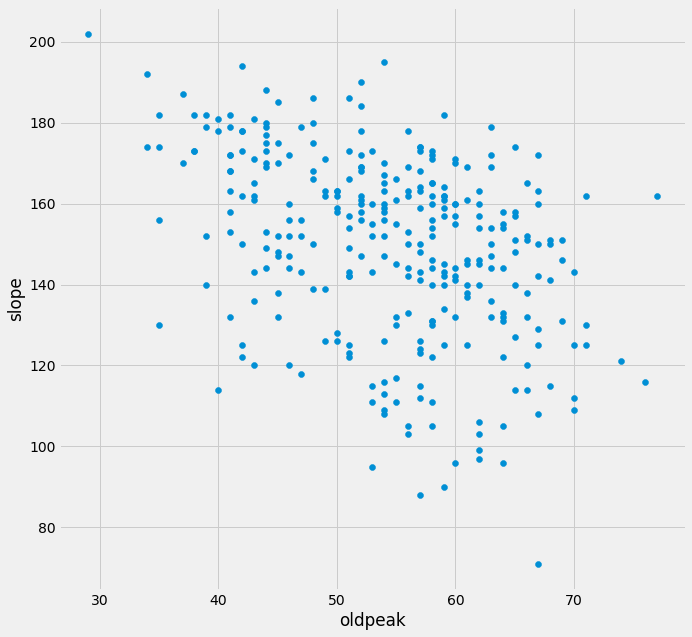

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(data['age'],data['thalach'])
plt.xlabel('oldpeak')
plt.ylabel('slope')


In [23]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
X = data.drop(['target'],axis = 1)
Y = data.target.values.reshape(-1,1)
print('X shape {},Y shape {}'.format(X.shape,Y.shape))
      

X shape (303, 13),Y shape (303, 1)


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X ,Y ,test_size = 0.3 ,random_state = 42)

In [26]:
print('X_train shape : {}'.format(X_train.shape))
print('Y_train shape : {} '.format(Y_train.shape))
print('X_test shape : {} '.format(X_test.shape))
print('Y_test shape : {} '.format(Y_test.shape))

X_train shape : (212, 13)
Y_train shape : (212, 1) 
X_test shape : (91, 13) 
Y_test shape : (91, 1) 


In [27]:
# feature importance
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()
xgb.fit(X_train,Y_train)

imp = pd.DataFrame(xgb.feature_importances_ , columns=['importance'] ,index=X_train.columns)
imp = imp.sort_values(['importance'],ascending = False)
print(imp)

          importance
ca          0.217278
thal        0.169496
cp          0.165383
exang       0.153602
slope       0.062289
oldpeak     0.057247
thalach     0.045901
age         0.044410
chol        0.033694
sex         0.029520
trestbps    0.020533
fbs         0.000648
restecg     0.000000


C:\Users\numan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\numan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [48]:
from sklearn.metrics import accuracy_score

In [47]:
model_ac=[]
accuracy=[]
classifiers = ['SCV','GaussianProcessClassifier','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GaussianNB']
models = [SVC(kernel='rbf'),GaussianProcessClassifier(1.0 * RBF(1.0)),DecisionTreeClassifier(max_depth=5),
          RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
         ,AdaBoostClassifier(),GaussianNB()]

for i in models:
    model = i
    model.fit(X_train,Y_train)
    pred = model.predict(X_test)
   
    model_ac.append(metrics.accuracy_score(pred,Y_test))
    
new_models_dataframe2=pd.DataFrame(model_ac,index=classifiers)   
new_models_dataframe2.columns=['accurary']    
new_models_dataframe2 = new_models_dataframe2.sort_values(['accurary'],ascending = True)
new_models_dataframe2

NameError: name 'metrics' is not defined

In [32]:
plt.figure(figsize=(10,10))
plt.plot(new_models_dataframe2['accurary'])
plt.xlabel('model')
plt.ylabel('accurary')
plt.show()


NameError: name 'new_models_dataframe2' is not defined

<Figure size 720x720 with 0 Axes>

K-FOLD

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [42]:
kfold = KFold(n_splits=10 ,random_state=42)


In [44]:
means = []
accuracy = []
classifiers = ['SCV','GaussianProcessClassifier','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GaussianNB']
models = [SVC(kernel='rbf'),GaussianProcessClassifier(1.0 * RBF(1.0)),DecisionTreeClassifier(max_depth=5),
          RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
         ,AdaBoostClassifier(),GaussianNB()]

for i in models:
    
    model = i
    
    cv = cross_val_score(model ,X ,Y ,cv=kfold,scoring='accuracy')
    cv = cv
    
    means.append(cv.mean())
    accuracy.append(cv)
    
new_models_dataframe3=pd.DataFrame(means,index=classifiers)   
new_models_dataframe3.columns=['CV Mean']    
new_models_dataframe3.sort_values(['CV Mean'],ascending = False)







,CV Mean
GaussianNB,0.804731
AdaBoostClassifier,0.748280
DecisionTreeClassifier,0.721828
RandomForestClassifier,0.699140
GaussianProcessClassifier,0.517957
SCV,0.056237


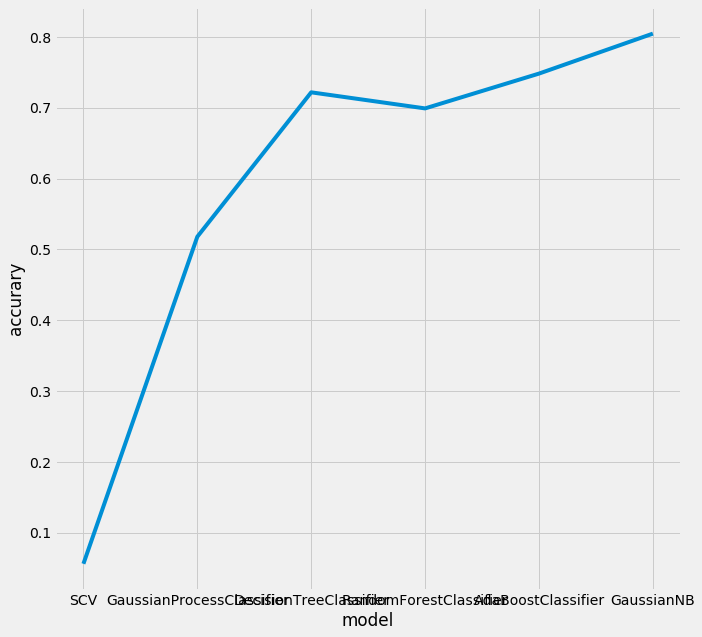

In [46]:
plt.figure(figsize=(10,10))
plt.plot(new_models_dataframe3['CV Mean'])
plt.xlabel('model')
plt.ylabel('accurary')
plt.show()
